In [15]:
import pandas as pd

In [16]:
nciDF = pd.read_csv('NCI-HistoricalData_1661949777189.csv', parse_dates = ['Date'], infer_datetime_format=True)

In [17]:
nciDF['strDate'] = nciDF['Date'].dt.strftime('%Y-%m-%d')
nciDF.set_index('strDate', drop=True, inplace=True)
nciDF.rename(columns={'Clôture/Dernier':'NCI'}, inplace=True)
df1 = nciDF[['NCI']]
display(df1)

,NCI
strDate,
2022-08-30,1247.88
2022-08-29,1257.52
2022-08-26,1278.02
2022-08-25,1349.52
2022-08-24,1336.30
...,...
2021-04-20,3127.80
2021-04-19,2973.20
2021-04-16,3373.59


In [18]:
import pandas as pd
import httpx
host = 'http://localhost:9000'
async def getSymb(fromIsoInstant: str, toIsoInstant: str, symb: str) -> pd.DataFrame:
    def listToStr(l):
        result = l[0]
        for i in range(1, len(l)):
            result += f", {l[i]}"
        return result
    
    columns = ['symb', 'open_time', 'close', 'volume', 'close_time', 'quote_asset_vol']        
    sqlStmt = "SELECT %s FROM 'binance_daily' WHERE symb = '%s' AND open_time >= '%s' AND open_time < '%s'"%(listToStr(columns), symb, fromIsoInstant, toIsoInstant)

    query_params = {'query': sqlStmt, 'fmt': 'json'}
    async with httpx.AsyncClient() as client:
        r = await client.get(host + '/exec', params=query_params)
    jsonR = r.json()
    #print(jsonR)
    result = pd.DataFrame(columns=columns, data=jsonR['dataset'])
    result['strDate'] = result.apply(lambda row: row['open_time'][0:10], axis = 1)
    result.set_index('strDate', drop=True, inplace=True)
    result.rename(columns={'close':symb}, inplace=True)
    result = result[[symb]].sort_values('strDate')
    
    return result    

In [19]:
btcDF = await getSymb('2020-12-01T00:00:00.000000Z', '2022-08-30T00:00:00.000000Z', 'BTCUSDT')
btcDF.rename(columns={'BTCUSDT':'BTC'}, inplace=True)
df2 = btcDF[['BTC']].sort_values('strDate')
df2['BTC'] = 1000*(df2['BTC']/(df2['BTC'][0]))
del btcDF

In [20]:
df2

,BTC
strDate,
2020-12-01,1000.000000
2020-12-02,1023.401595
2020-12-03,1035.008868
2020-12-04,993.901399
2020-12-05,1020.394395
...,...
2022-08-25,1148.898799
2022-08-26,1078.662038
2022-08-27,1067.820022


In [21]:
onnDF = pd.read_csv('Historical-ONN-B-30dW-30dR_2020-12-01_2022-08-30.csv', parse_dates = ['Date'], infer_datetime_format=True)

In [22]:
import datetime
onnDF['strDate'] = onnDF['Date'].apply(lambda val : (val - datetime.timedelta(seconds=1)).strftime('%Y-%m-%d'))
onnDF.set_index('strDate', drop=True, inplace=True)
onnDF.rename(columns={'Close':'ONN-B'}, inplace=True)
df3 = onnDF[['ONN-B']]
display(df3)

,ONN-B
strDate,
2020-11-30,1000.00
2020-12-01,949.04
2020-12-02,971.89
2020-12-03,984.79
2020-12-04,932.79
...,...
2022-08-25,1306.21
2022-08-26,1206.22
2022-08-27,1196.51


In [23]:
onnAltDF = pd.read_csv('Historical-ONN-Alt-B-30dW-30dR_2020-12-01_2022-08-30.csv', parse_dates = ['Date'], infer_datetime_format=True)
onnAltDF['strDate'] = onnAltDF['Date'].apply(lambda val : (val - datetime.timedelta(seconds=1)).strftime('%Y-%m-%d'))
onnAltDF.set_index('strDate', drop=True, inplace=True)
onnAltDF.rename(columns={'Close':'ONN-Alt-B'}, inplace=True)
df4 = onnAltDF[['ONN-Alt-B']]
display(df4)

,ONN-Alt-B
strDate,
2020-11-30,1000.00
2020-12-01,938.54
2020-12-02,964.35
2020-12-03,981.63
2020-12-04,896.07
...,...
2022-08-25,1790.79
2022-08-26,1621.66
2022-08-27,1612.21


In [24]:
onnVapDF = pd.read_csv('Historical-ONN-Vap-B-30dW-30dR_2020-12-01_2022-08-30.csv', parse_dates = ['Date'], infer_datetime_format=True)
onnVapDF['strDate'] = onnVapDF['Date'].apply(lambda val : (val - datetime.timedelta(seconds=1)).strftime('%Y-%m-%d'))
onnVapDF.set_index('strDate', drop=True, inplace=True)
onnVapDF.rename(columns={'Close':'ONN-Vap-B'}, inplace=True)
df5 = onnVapDF[['ONN-Vap-B']]
display(df5)

,ONN-Vap-B
strDate,
2020-11-30,1000.00
2020-12-01,932.46
2020-12-02,966.39
2020-12-03,975.48
2020-12-04,889.29
...,...
2022-08-25,1310.61
2022-08-26,1208.02
2022-08-27,1209.30


In [25]:
#onnCategRebal = pd.read_csv('Historical-ONN-CategRebalDaily-B-30dW-30dR_2020-12-01_2022-06-24.csv', parse_dates = ['Date'], infer_datetime_format=True)
#onnCategRebal['strDate'] = onnCategRebal['Date'].apply(lambda val : (val - datetime.timedelta(seconds=1)).strftime('%Y-%m-%d'))
#onnCategRebal.set_index('strDate', drop=True, inplace=True)
#onnCategRebal.rename(columns={'Close':'ONN-CategRebalDaily-B'}, inplace=True)
#df6 = onnCategRebal[['ONN-CategRebalDaily-B']]

In [26]:
onnCategRebal2 = pd.read_csv('Historical-ONN-CategRebalDaily2-B-30dW-30dR_2020-12-01_2022-08-30.csv', parse_dates = ['Date'], infer_datetime_format=True)
onnCategRebal2['strDate'] = onnCategRebal2['Date'].apply(lambda val : (val - datetime.timedelta(seconds=1)).strftime('%Y-%m-%d'))
onnCategRebal2.set_index('strDate', drop=True, inplace=True)
onnCategRebal2.rename(columns={'Close':'ONN-CategRebalDaily2-B'}, inplace=True)
df7 = onnCategRebal2[['ONN-CategRebalDaily2-B']]
display(df7)

,ONN-CategRebalDaily2-B
strDate,
2020-11-30,999.000000
2020-12-01,983.086805
2020-12-02,999.771610
2020-12-03,1013.814732
2020-12-04,950.661570
...,...
2022-08-24,3491.615976
2022-08-25,3519.918205
2022-08-26,3210.520391


In [27]:
onnPortOpt = pd.read_csv('Historical-ONN-PortfolioOptDaily-B-30dW-30dR_2020-12-01_2022-08-30.csv', parse_dates = ['Date'], infer_datetime_format=True)
onnPortOpt['strDate'] = onnPortOpt['Date'].apply(lambda val : (val - datetime.timedelta(seconds=1)).strftime('%Y-%m-%d'))
onnPortOpt.set_index('strDate', drop=True, inplace=True)
onnPortOpt.rename(columns={'Close':'ONN-PortfolioOptDaily-B'}, inplace=True)
df8 = onnPortOpt[['ONN-PortfolioOptDaily-B']]
display(df8)

,ONN-PortfolioOptDaily-B
strDate,
2020-12-31,998.999884
2021-01-01,1097.282399
2021-01-02,1259.165029
2021-01-03,1190.551943
2021-01-04,1222.148255
...,...
2022-08-24,10948.530453
2022-08-25,11168.875871
2022-08-26,10326.422202


In [28]:
df = pd.concat([df1, df2, df3, df4, df5, df7, df8], join='inner', axis=1).sort_values('strDate')
df

,NCI,BTC,ONN-B,ONN-Alt-B,ONN-Vap-B,ONN-CategRebalDaily2-B,ONN-PortfolioOptDaily-B
strDate,,,,,,,
2021-04-14,3418.53,3355.164626,3508.16,4180.71,4508.18,7026.925258,18086.032287
2021-04-15,3456.03,3365.846770,3533.50,4311.53,4655.62,7381.336619,18863.791842
2021-04-16,3373.59,3268.581441,3417.68,4340.27,4789.14,7680.969244,22094.101775
2021-04-19,2973.20,2964.735336,3073.44,3890.89,4285.22,6961.843071,19812.783707
2021-04-20,3127.80,3006.934201,3184.18,4084.73,4435.02,7037.942506,21056.362598
...,...,...,...,...,...,...,...
2022-08-22,1333.17,1140.414368,1284.10,1737.77,1288.93,3496.027681,11073.917323
2022-08-23,1335.08,1147.304337,1298.78,1770.81,1304.45,3547.689212,11063.033653
2022-08-24,1336.30,1138.722385,1288.35,1757.01,1291.89,3491.615976,10948.530453


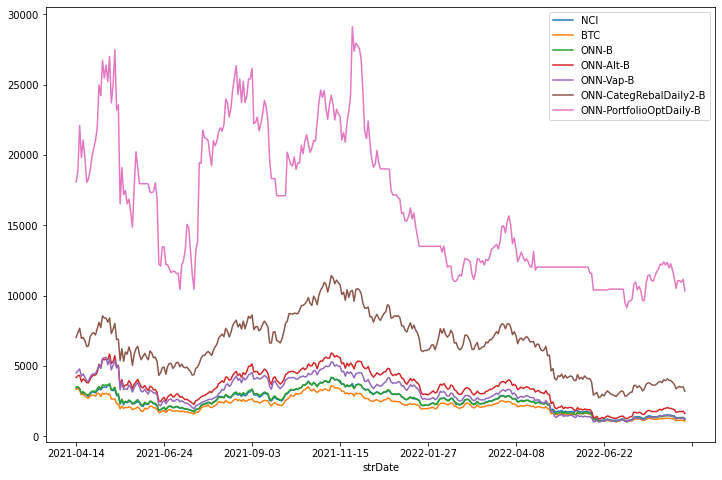

In [29]:
df.plot(figsize=(12,8));